In [9]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sn # Generates visuals
import matplotlib as mat #Generates visuals

In [10]:
!pip install pyreadstat
import pyreadstat as py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 22.2 MB/s eta 0:00:00


In [4]:
from google.colab import drive
import pandas as pd

# First Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import datasets

In [13]:
# locate the file path
file_path = '/content/drive/My Drive/Data analytics and visualization/DiamondPricesData.xlsx'
diamonds = pd.read_excel(file_path)

In [6]:
file_path2 = '/content/drive/My Drive/Data analytics and visualization/Female_Mps.csv'
politicians = pd.read_csv(file_path2)

In [11]:
file_path3 = '/content/drive/My Drive/Data analytics and visualization/Dec11.sav'
dec = pd.read_spss(file_path3)

## LESSON RECAP: ##

1. Data importation (csv, excel, spss)
2. Descriptive stats
3. Checked for missing data

In [14]:
# Note: To generate descriptive stats for object (string) data
diamonds.describe(include=object)


,cut,color,clarity
count,53940,53934,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11286,13065


## DATA EXPLORATION AND CLEANING ##

1. Explore for missing data
2. Explore data distribution (normal or non-gaussian distribution)
3. Check for outliers

**A. MISSING DATA**

In [15]:
diamonds.isna()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False


In [16]:
#To actually count the missing data
diamonds.isna().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

**B. DATA DISTRIBUTION**

Note: The data model assumes normal distribution

1. Inspect using visuals
2. Categorical data: Barplots
3.Continuous data: Histograms/boxplots
4.Using Q-Q plots (these show the expected normal distribution versus the reality)
5. Generate statistics
6. Continuous data: Shapiro-Wilk test (3-5000 samples)
7. Continuous and categorical data: Kolmogorov-Smirnov test (>5000 samples)



1. Transform the dataset to subset the categorical data from the continuous data


In [17]:
#Checking the data types
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53934 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53926 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [18]:
#Subset the object variables (cut, color, clarity)
diamonds_cat = diamonds[["cut","color","clarity"]]
diamonds_cat

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [19]:
#Subset the continuous variables
diamonds_cont = diamonds.drop(columns=['cut','color','clarity'])
diamonds_cont

,price,carat,depth,table,x,y,z
0,326,0.23,61.5,55.0,3.95,3.98,2.43
1,326,0.21,59.8,61.0,3.89,3.84,2.31
2,327,0.23,56.9,65.0,4.05,4.07,2.31
3,334,0.29,62.4,58.0,4.20,4.23,2.63
4,335,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,2757,0.72,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,61.0,58.0,6.15,6.12,3.74


2. Visuals for categorical data


In [20]:
#Plotting for one all categorical variables
import matplotlib.pyplot as plt  #library for visuals
#First generate a function for the multiple barcharts
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

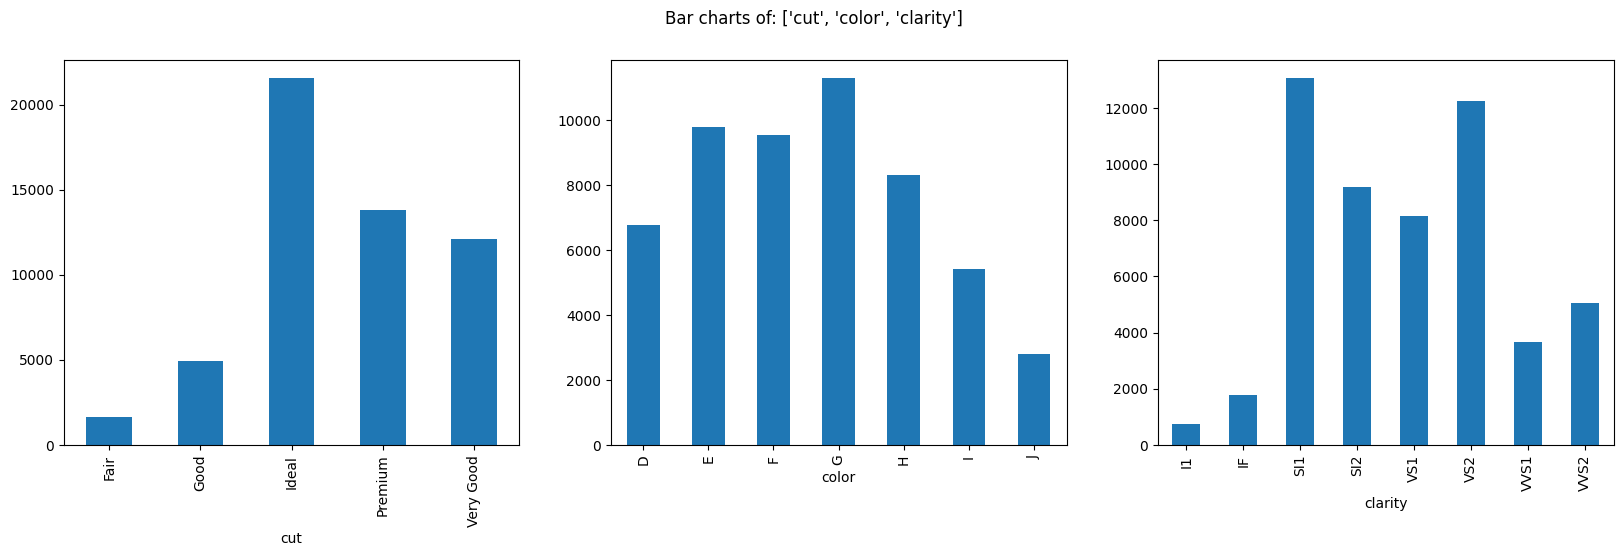

In [21]:
#Use the above function to generate the barplots
PlotBarCharts(inpData=diamonds_cat, colsToPlot=['cut', 'color', 'clarity'])

3. Visuals for Continuous data

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

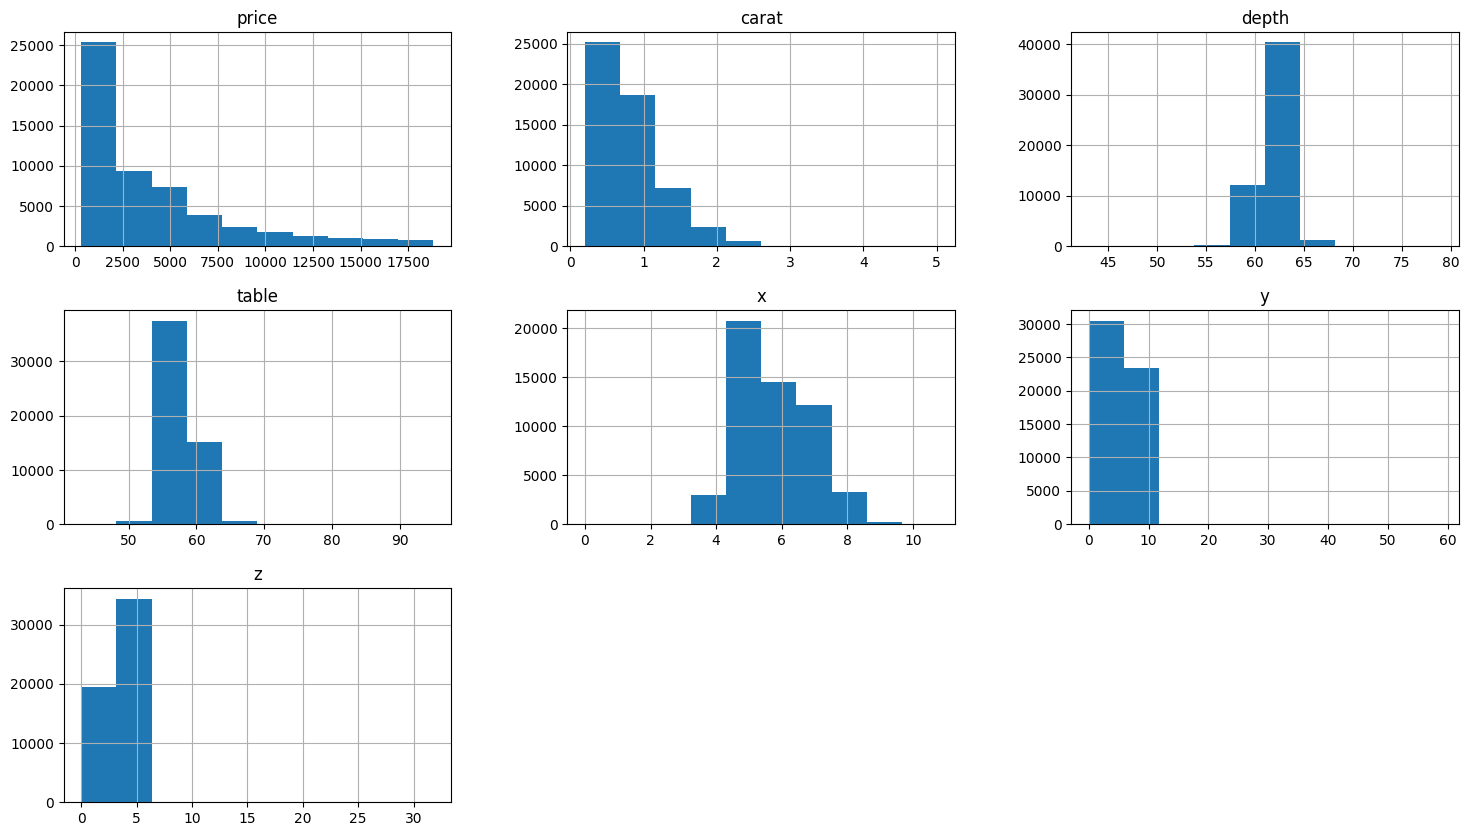

In [22]:
#Using multiple histograms
diamonds_cont.hist(figsize=(18,10))

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

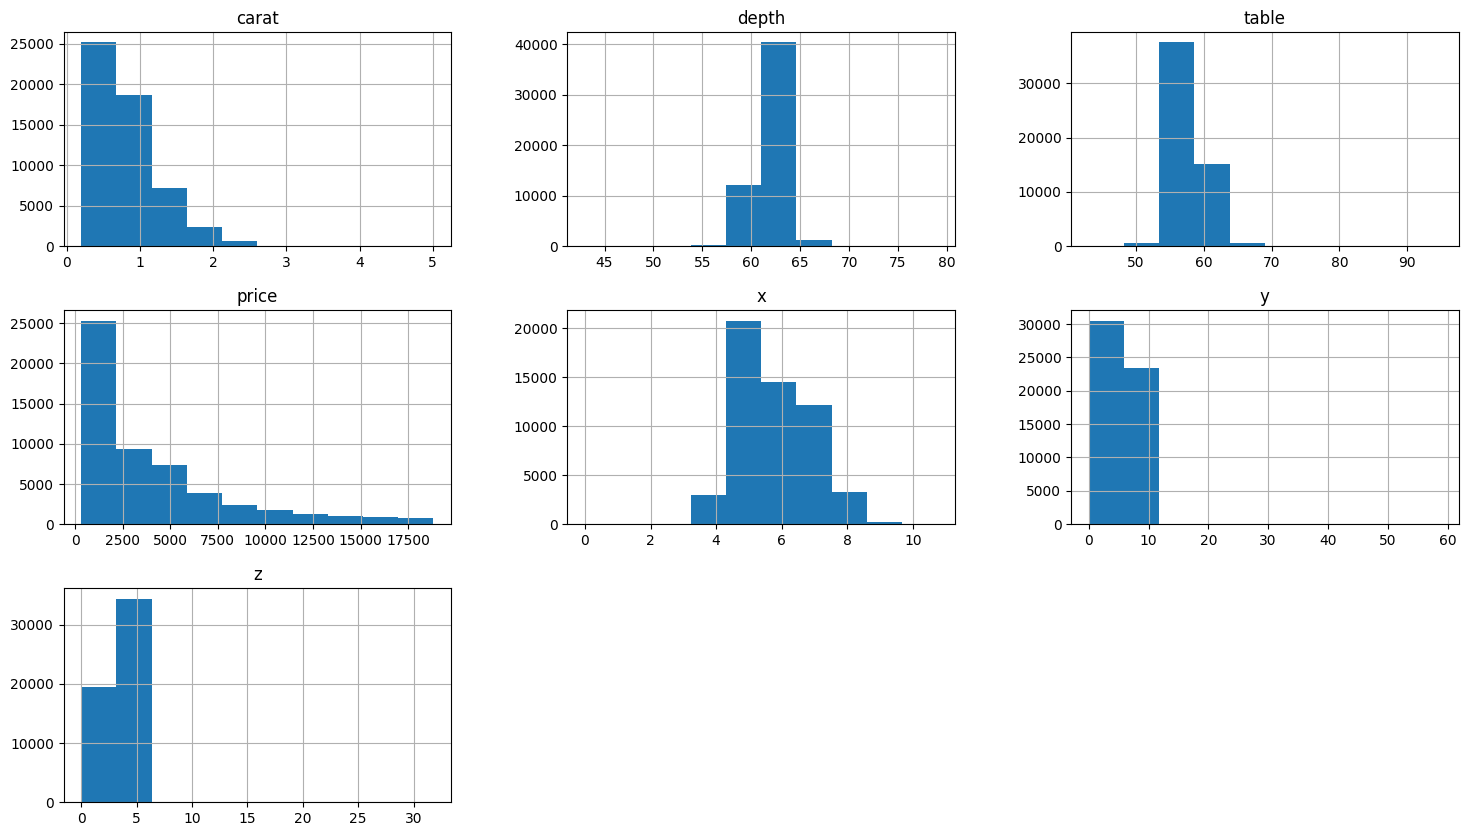

In [23]:
#OR one could use the entire diamonds dataframe and specify the columns to be plots
diamonds.hist(['carat', 'depth', 'table','price', 'x','y','z'], figsize=(18,10))

array([[<Axes: title={'center': 'price'}>]], dtype=object)

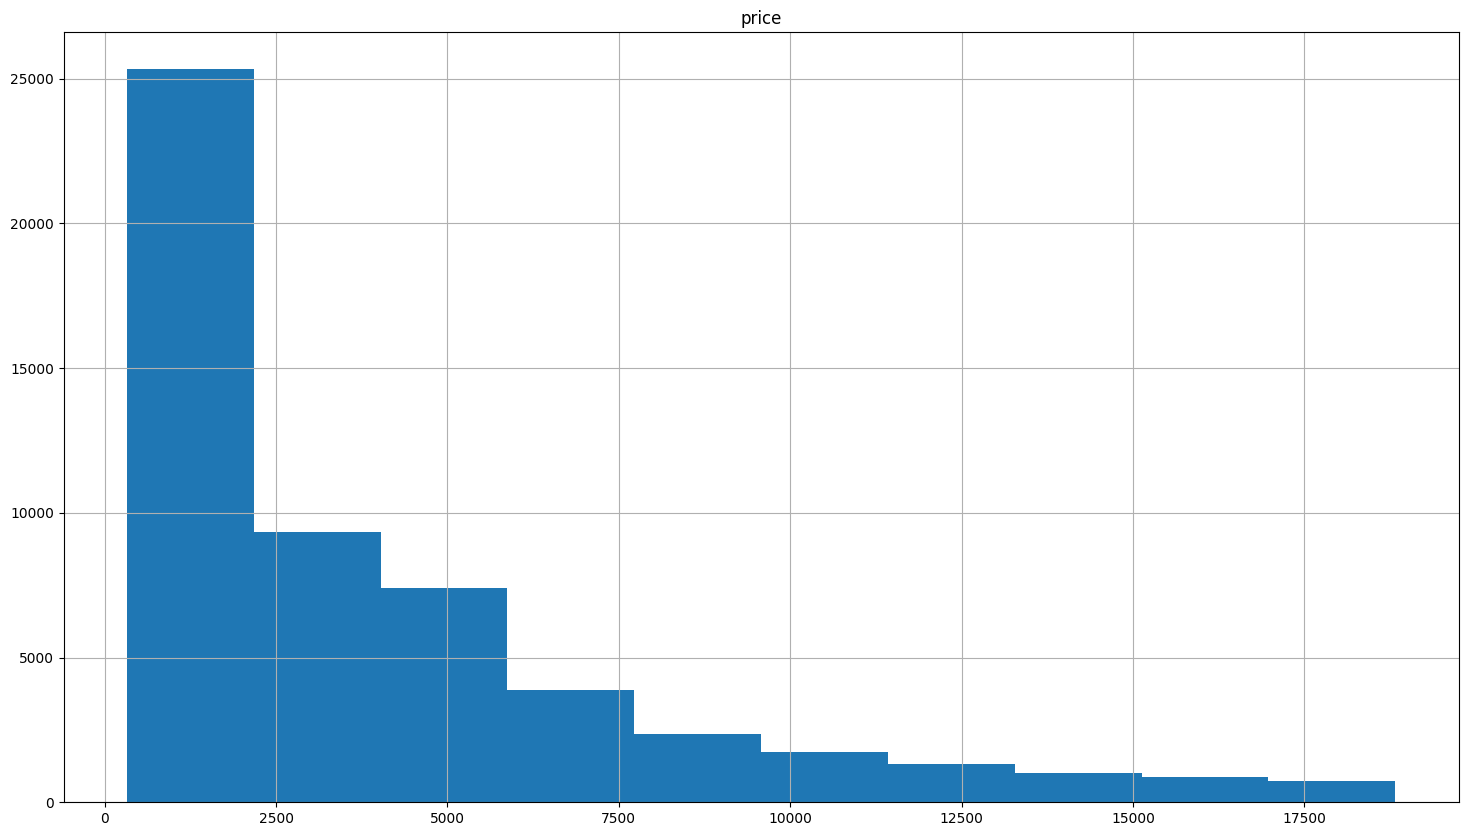

In [24]:
#To generate a histogram for only one variable
diamonds_cont.hist(['price'], figsize=(18,10))

We can also use boxplots to illustrate distribution and check for outliers

<Axes: >

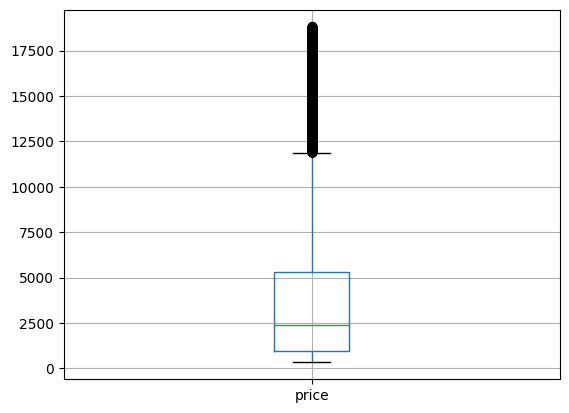

In [25]:
#Boxplot of the variable price
diamonds_cont.boxplot(['price'])

3. USING Q-Q PLOTS

In [26]:
#Plot distribution of the dataset using a Q-Q plot
#Import key libraries
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

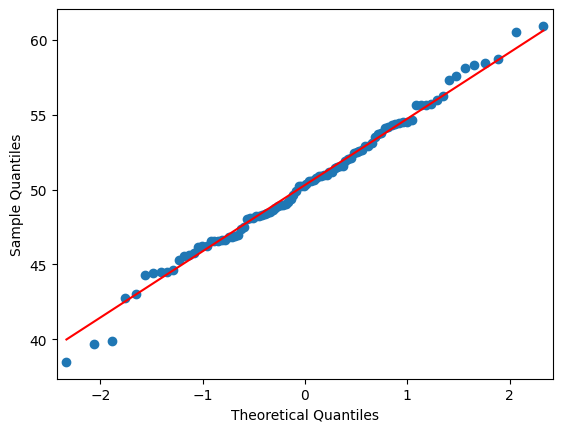

In [27]:
#For categorical data
# seed the random number generator
seed(1)
# generate univariate observations
diamonds_cat = 5 * randn(100) + 50
# q-q plot
qqplot((diamonds_cat), line='s')
pyplot.show()

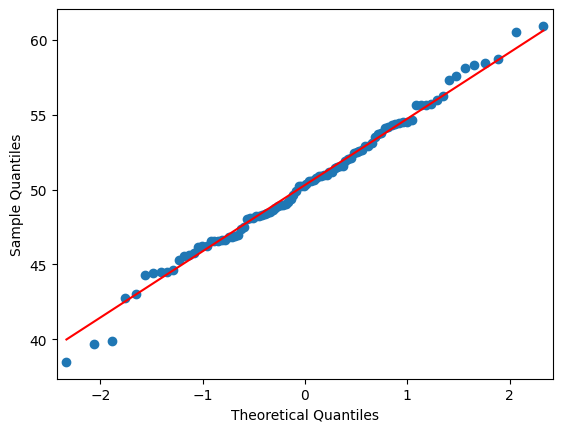

In [28]:
#For continuous data
# seed the random number generator
seed(1)
# generate univariate observations
diamonds_cont = 5 * randn(100) + 50
# q-q plot
qqplot((diamonds_cont), line='s')
pyplot.show()

4. USING STATISTICAL TESTS

Note: The data model assumes that all variables are normally distributed

If the p-value of these tests is greater than α = 0.05, then the data is assumed to be normally distributed.

Null hypothesis (Ho) assumes that data is normally distributed (Gaussian) at p>0.05

Alternative hypothesis (Ha) assumes the reverse

In [30]:
#Shapiro-Wilk works with less than 5000 samples
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test for categorical variables
stat, p = shapiro(diamonds_cat)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


In [31]:
# normality test for continuous variables
stat, p = shapiro(diamonds_cont)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


In [32]:
#Alternatively just generate the Shapiro statistic which shows the relationship
#between the observations and the expected
#Normality test for price
from scipy import stats
res = stats.shapiro(diamonds_cont)
res.statistic

0.9920047521591187

In [33]:
#OR
from scipy.stats import shapiro
#perform Shapiro-Wilk test
shapiro(diamonds_cont)

ShapiroResult(statistic=0.9920047521591187, pvalue=0.8215700387954712)

Result: There's a 99.2% similarity between the observed and expected.

However, the diamonds dataset has over 5000 samples, so we are supposed to use the K-S test for normality (Kolmogorov-Smirnov (K-S) test)

In [35]:
#Do the same for "price" in the diamonds dataset
#First create an array of values from a normal distribution with mean and standard deviation of the "1945" variable
import numpy as np
price_norm = np.random.normal(np.mean(diamonds['price']), np.std(diamonds['price']), len(diamonds))

<Axes: xlabel='price', ylabel='Proportion'>

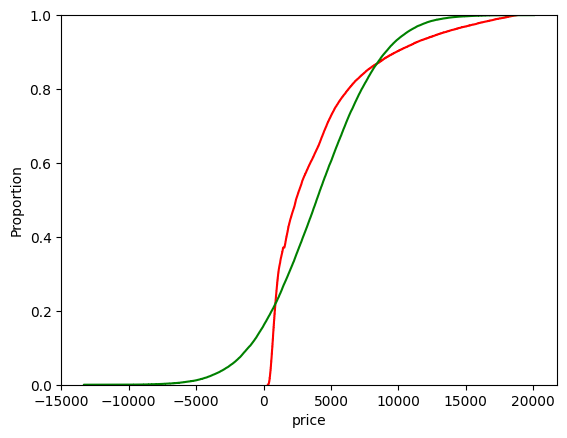

In [36]:
# plot the display of the distribution of price
import seaborn as sns

sns.ecdfplot(diamonds['price'], c='red')
sns.ecdfplot(price_norm, c='green')

Price doesn't look normally distributed above (red) but we can confirm with K-S test

In [38]:
# Confirm using the K-S test for normal distribution
from scipy.stats import kstest

result = (kstest(diamonds['price'], cdf='norm'))

print(f"K-S statistic: {result[0]}")
print(f"p-value: {result[1]}")

K-S statistic: 1.0
p-value: 0.0


The K-statistic is 100% but..
p-value is less than 0.05, confirming that Price isn't normally distributed

**D. CHECKING FOR OUTLIERS**

1. Using descriptive stats
2. Visually (boxplots, histograms, Q-Q plots)
3. Statistics (Normal distribution)
4. Inter-quartile range (IQR)

In [39]:
#Using descriptive stats
diamonds.describe()

,price,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53926.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,3932.799722,0.797940,61.749479,57.457184,5.731157,5.734526,3.538734
std,3989.439738,0.474011,1.432661,2.234491,1.121761,1.142135,0.705699
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,950.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5324.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,18823.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


a. Look at the mean and maximum points for price (they're too far apart)

b. The above is also apparent for carat, depth, table, x, y, z

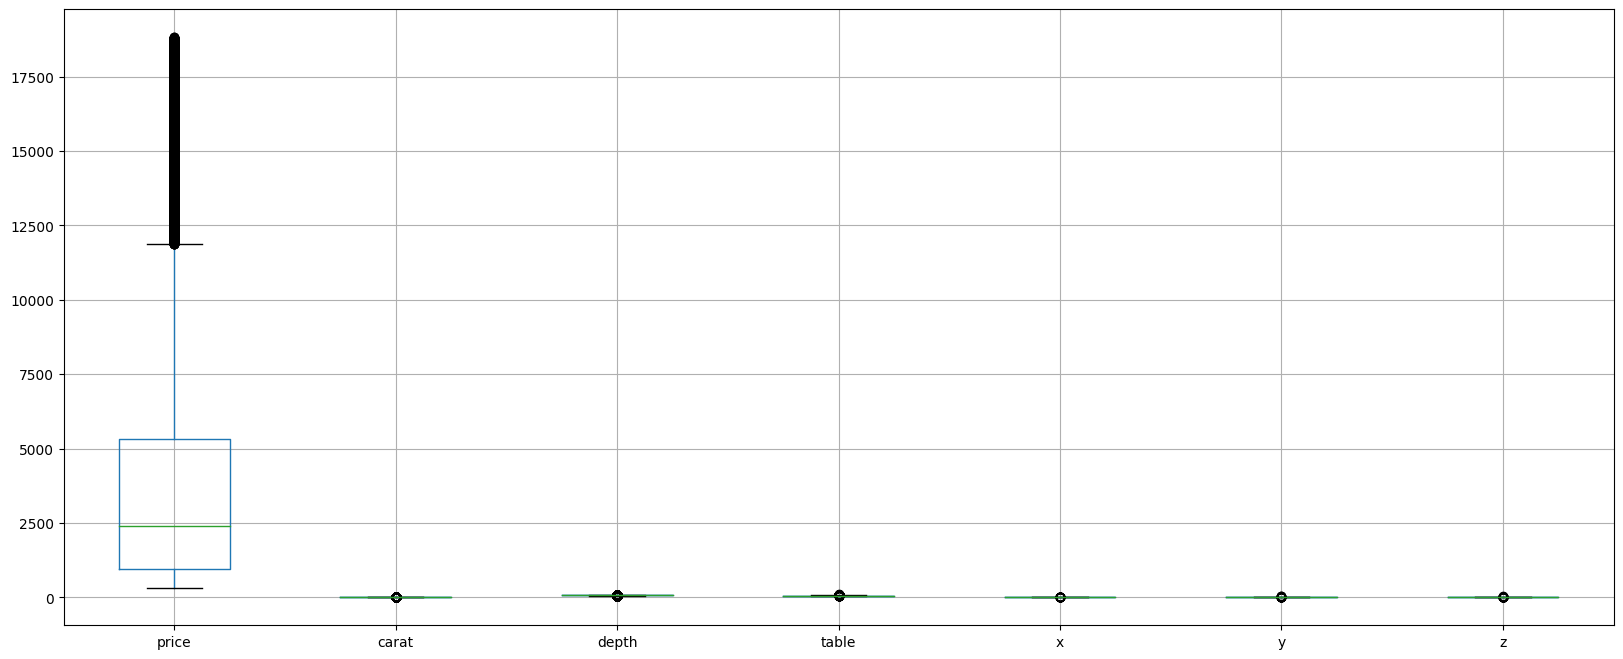

In [ ]:
#Visual inspection with boxplots
diamonds.boxplot(figsize=(20,8))
plt.show()

In [41]:
#Outliers can also be detected using IQR method which is more robust
#Create a function to find outliers using IQR

def find_outliers_IQR(diamonds):

   q1=diamonds.quantile(0.25)

   q3=diamonds.quantile(0.75)

   IQR=q3-q1

   outliers = diamonds[((diamonds<(q1-1.5*IQR)) | (diamonds>(q3+1.5*IQR)))]

   return outliers

In [42]:
#Then use the above function to search for outliers in each variable e.g. price
outliers = find_outliers_IQR(diamonds["price"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 3540
max outlier value: 18823
min outlier value: 11886


23820    11886
23821    11886
23822    11888
23823    11888
23824    11888
         ...  
27745    18803
27746    18804
27747    18806
27748    18818
27749    18823
Name: price, Length: 3540, dtype: int64

Result: There are 3540 outliers in the variable price

The maximum threshold is 18823 dollars

The minimum threshold is 11886 dollars

In [43]:
#Run the same for more than one variable
outliers_all = find_outliers_IQR(diamonds[["depth","table","x","y","z"]])

outliers_all

,depth,table,x,y,z
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,56.9,65.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
53935,NaN,NaN,NaN,NaN,NaN
53936,NaN,NaN,NaN,NaN,NaN
53937,NaN,NaN,NaN,NaN,NaN
53938,NaN,NaN,NaN,NaN,NaN


Points that show "NaN" illustrate no outlier, while those showing a number are an outlier

## DATA CLEANING/TRANSFORMATION/ WRANGLING ##

1. Handling outliers

2. Handling missing data

3. Other transformations (adding variables)

**A. HANDLING OUTLIERS**

1. Delete the outliers (if no more than 30% of total dataset)

2. Set thresholds (set a limit for the minimum and maximum points)

3. Replace outliers that are missing data(imputation with mean for normal data, median for non-normal data)

In [44]:
# Delete outliers using the "drop.na" function
def drop_outliers_IQR(diamonds):

   q1=diamonds.quantile(0.25)

   q3=diamonds.quantile(0.75)

   IQR=q3-q1

   not_outliers = diamonds[~((diamonds<(q1-1.5*IQR)) | (diamonds>(q3+1.5*IQR)))]

   outliers_dropped = outliers.dropna().reset_index()

   return outliers_dropped

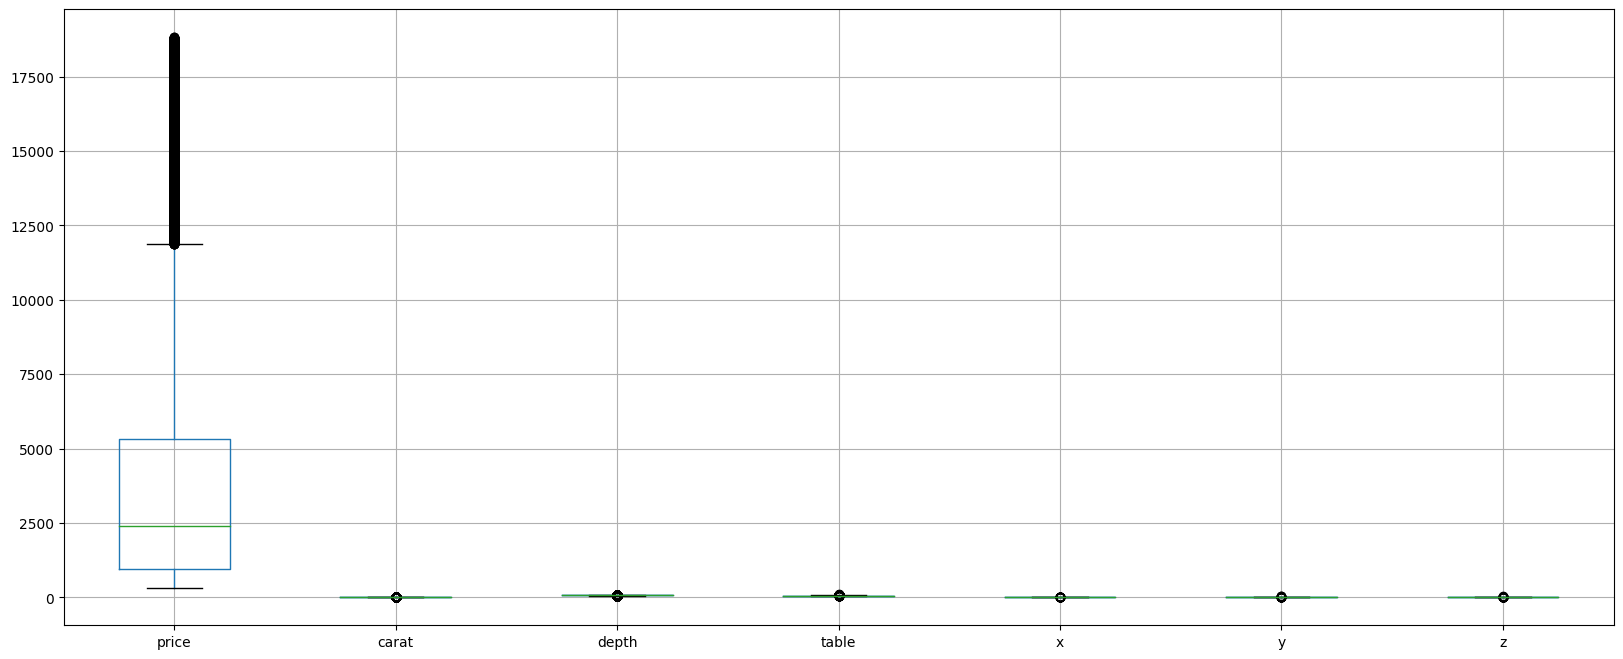

In [45]:
#Check the distribution of the dataset after dropping outliers
diamonds.boxplot(figsize=(20,8))
plt.show()

In [46]:
# Set thresholds
#Working with the politicians dataset

def find_outliers_IQR(politicians):

   q1=politicians.quantile(0.25)

   q3=politicians.quantile(0.75)

   IQR=q3-q1

   outliers_politicians = politicians[((politicians<(q1-1.5*IQR)) | (politicians>(q3+1.5*IQR)))]

   return outliers_politicians

In [47]:

#Looking for outliers in the year 1945
outliers_politicians = find_outliers_IQR(politicians["1945"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers_politicians

number of outliers: 3540
max outlier value: 18823
min outlier value: 11886


Series([], Name: 1945, dtype: float64)

**B. HANDLING MISSING DATA**

1. Remove the missing points if no more than 30% of dataset

2. Impute missing data with zeros (if certain there was no information)

3. Impute with mean (if numeric variables are normally distributed)

4. Impute with median (if numeric variables are not normally distributed)

5. Impute with mode (if variables are text/string/objects)

In [48]:
#For instance diamonds dataset has few missing observations
diamonds.isna().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

In [49]:
#Remove the missing info, then generate a new dataframe
diamonds_new = diamonds.dropna()
#Check to see if missing info is removed
diamonds_new.isna().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [50]:
#Store the newly generated dataframe as a csv or excel
#diamonds_new is your dataframe
diamonds_new.to_csv("diamonds_new.csv", sep=',', encoding='utf-8', index=False)

In [51]:
#Store as excel
#requires openpyxl package
#df is your dataframe
diamonds_new.to_excel("diamonds_new.xlsx", sheet_name='Transformed Data', index=False)

In [52]:
#Impute missing data with zeros
#Case study: politicians dataframe
#Justification: We are certain the missing data is an actuality,
#also there's too much missing to be deleted
politicians.isna().sum()

country      0
1945       167
1946       150
1947       144
1948       136
          ... 
2017         9
2018         9
2019         1
2020         2
2021         2
Length: 78, dtype: int64

In [53]:
#Replace the missing data with zero using "fillna"
politicians_new = politicians.fillna(0)
politicians_new.isna().sum()

country    0
1945       0
1946       0
1947       0
1948       0
          ..
2017       0
2018       0
2019       0
2020       0
2021       0
Length: 78, dtype: int64

In [54]:
#Imputing missing data with mode
#Case study: diamonds dataset
#Check for missing data
diamonds.isna().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

In [55]:
# Color is a categorical variable so we impute using mode
diamonds2 = diamonds['color'].fillna(value=diamonds['color'].mode(), inplace=True)


In [56]:
#To impute for depth which in the original dataset has outliers, we use median
diamonds3 = diamonds['depth'].fillna(value=diamonds['depth'].median(), inplace=True)


In [57]:
#Further transformation
#Adding a variable
#Add a variable called "price_by_carat" to the diamonds dataframe which is the price*carat
diamonds['price_by_carat'] = diamonds.apply(lambda row: (row.price*row.carat), axis = 1)
#Check the dataframe
print(diamonds)

       price  carat        cut color clarity  depth  table     x     y     z  \
0        326   0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43   
1        326   0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31   
2        327   0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31   
3        334   0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63   
4        335   0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75   
...      ...    ...        ...   ...     ...    ...    ...   ...   ...   ...   
53935   2757   0.72      Ideal     D     SI1   60.8   57.0  5.75  5.76  3.50   
53936   2757   0.72       Good     D     SI1   63.1   55.0  5.69  5.75  3.61   
53937   2757   0.70  Very Good     D     SI1   62.8   60.0  5.66  5.68  3.56   
53938   2757   0.86    Premium     H     SI2   61.0   58.0  6.15  6.12  3.74   
53939   2757   0.75      Ideal     D     SI2   62.2   55.0  5.83  5.87  3.64   

       price_by_carat  
0              